# Part I - Getting to know the Borrower's who request for Loans from Prosper      Loan Data

## by Onyeka 


## Preliminary Wrangling
> This data set contains 113,937 loans with 81 variables on each loan with some information about the borrower who requested for the loan. 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe
prosper_loan = pd.read_csv('prosperLoanData.csv')

In [4]:
prosper_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
# check for the shape of the dataframe
prosper_loan.shape

(113937, 81)

In [6]:
# check for info about the dataframe for better understanding
prosper_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
# select the column of interest in the prosper loan dataframe
new_prosper_loan = prosper_loan[['ListingKey','Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ListingCategory (numeric)', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange', 'StatedMonthlyIncome', 'IncomeVerifiable', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'Investors' ]]

In [8]:
new_prosper_loan.head(20)

,ListingKey,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,StatedMonthlyIncome,IncomeVerifiable,LoanOriginalAmount,MonthlyLoanPayment,Investors
0,1021339766868145413AB3B,36,Completed,0.16516,0.1580,0.1380,0,Other,Self-employed,True,"$25,000-49,999",3083.333333,True,9425,330.43,258
1,10273602499503308B223C1,36,Current,0.12016,0.0920,0.0820,2,Professional,Employed,False,"$50,000-74,999",6125.000000,True,10000,318.93,1
2,0EE9337825851032864889A,36,Completed,0.28269,0.2750,0.2400,0,Other,Not available,False,Not displayed,2083.333333,True,3001,123.32,41
3,0EF5356002482715299901A,36,Current,0.12528,0.0974,0.0874,16,Skilled Labor,Employed,True,"$25,000-49,999",2875.000000,True,10000,321.45,158
4,0F023589499656230C5E3E2,36,Current,0.24614,0.2085,0.1985,2,Executive,Employed,True,"$100,000+",9583.333333,True,15000,563.97,20
5,0F05359734824199381F61D,60,Current,0.15425,0.1314,0.1214,1,Professional,Employed,True,"$100,000+",8333.333333,True,15000,342.37,1
6,0F0A3576754255009D63151,36,Current,0.31032,0.2712,0.2612,1,Sales - Retail,Employed,False,"$25,000-49,999",2083.333333,True,3000,122.67,1
7,0F1035772717087366F9EA7,36,Current,0.23939,0.2019,0.1919,2,Laborer,Employed,False,"$25,000-49,999",3355.750000,True,10000,372.60,1
8,0F043596202561788EA13D5,36,Current,0.07620,0.0629,0.0529,7,Food Service,Employed,True,"$25,000-49,999",3333.333333,True,10000,305.54,1
9,0F043596202561788EA13D5,36,Current,0.07620,0.0629,0.0529,7,Food Service,Employed,True,"$25,000-49,999",3333.333333,True,10000,305.54,1


In [9]:
# Checking the shape of the new prosper loan dataframe
new_prosper_loan.shape

(113937, 16)

In [10]:
# Checking the info of the new prosper loan dataframe
new_prosper_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingKey                 113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerAPR                113912 non-null  float64
 4   BorrowerRate               113937 non-null  float64
 5   LenderYield                113937 non-null  float64
 6   ListingCategory (numeric)  113937 non-null  int64  
 7   Occupation                 110349 non-null  object 
 8   EmploymentStatus           111682 non-null  object 
 9   IsBorrowerHomeowner        113937 non-null  bool   
 10  IncomeRange                113937 non-null  object 
 11  StatedMonthlyIncome        113937 non-null  float64
 12  IncomeVerifiable           113937 non-null  bool   
 13  LoanOriginalAmount         11

In [11]:
# check for null value(nan)
new_prosper_loan.isnull().sum()

ListingKey                      0
Term                            0
LoanStatus                      0
BorrowerAPR                    25
BorrowerRate                    0
LenderYield                     0
ListingCategory (numeric)       0
Occupation                   3588
EmploymentStatus             2255
IsBorrowerHomeowner             0
IncomeRange                     0
StatedMonthlyIncome             0
IncomeVerifiable                0
LoanOriginalAmount              0
MonthlyLoanPayment              0
Investors                       0
dtype: int64

In [12]:
#drop null values
new_prosper_loan.dropna(inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_12528\2692124354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_prosper_loan.dropna(inplace=True)


In [13]:
# check if all the non values has been dropped
new_prosper_loan.isnull().sum()

ListingKey                   0
Term                         0
LoanStatus                   0
BorrowerAPR                  0
BorrowerRate                 0
LenderYield                  0
ListingCategory (numeric)    0
Occupation                   0
EmploymentStatus             0
IsBorrowerHomeowner          0
IncomeRange                  0
StatedMonthlyIncome          0
IncomeVerifiable             0
LoanOriginalAmount           0
MonthlyLoanPayment           0
Investors                    0
dtype: int64

In [14]:
#checking for duplicates
new_prosper_loan.duplicated().sum()

812

In [15]:
#drop diplicated rows
new_prosper_loan.drop_duplicates(inplace=True)
new_prosper_loan.duplicated().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_12528\3979577468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_prosper_loan.drop_duplicates(inplace=True)


0

In [16]:
# Convert the following columns; LoanStatus, Occupation and EmploymentStatus into categorical datatype
new_prosper_loan['LoanStatus'] = new_prosper_loan['LoanStatus'].astype('category')
new_prosper_loan['Occupation'] = new_prosper_loan['Occupation'].astype('category')
new_prosper_loan['EmploymentStatus'] = new_prosper_loan['EmploymentStatus'].astype('category')

C:\Users\user\AppData\Local\Temp\ipykernel_12528\4193698295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_prosper_loan['LoanStatus'] = new_prosper_loan['LoanStatus'].astype('category')
C:\Users\user\AppData\Local\Temp\ipykernel_12528\4193698295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_prosper_loan['Occupation'] = new_prosper_loan['Occupation'].astype('category')
C:\Users\user\AppData\Local\Temp\ipykernel_12528\4193698295.py:4: SettingWithCopyWarning: 
A value is trying to be set on 

In [17]:
# confirm if LoanStatus is category datatype
new_prosper_loan['LoanStatus'].dtype

CategoricalDtype(categories=['Cancelled', 'Chargedoff', 'Completed', 'Current',
                  'Defaulted', 'FinalPaymentInProgress',
                  'Past Due (1-15 days)', 'Past Due (16-30 days)',
                  'Past Due (31-60 days)', 'Past Due (61-90 days)',
                  'Past Due (91-120 days)', 'Past Due (>120 days)'],
, ordered=False)

In [18]:
# confirm if Occupation is category datatype
new_prosper_loan['Occupation'].dtype

CategoricalDtype(categories=['Accountant/CPA', 'Administrative Assistant', 'Analyst',
                  'Architect', 'Attorney', 'Biologist', 'Bus Driver',
                  'Car Dealer', 'Chemist', 'Civil Service', 'Clergy',
                  'Clerical', 'Computer Programmer', 'Construction', 'Dentist',
                  'Doctor', 'Engineer - Chemical', 'Engineer - Electrical',
                  'Engineer - Mechanical', 'Executive', 'Fireman',
                  'Flight Attendant', 'Food Service',
                  'Food Service Management', 'Homemaker', 'Investor', 'Judge',
                  'Laborer', 'Landscaping', 'Medical Technician',
                  'Military Enlisted', 'Military Officer', 'Nurse (LPN)',
                  'Nurse (RN)', 'Nurse's Aide', 'Other', 'Pharmacist',
                  'Pilot - Private/Commercial',
                  'Police Officer/Correction Officer', 'Postal Service',
                  'Principal', 'Professional', 'Professor', 'Psychologist',
          

In [19]:
# confirm if EmploymentStatus is category datatype
new_prosper_loan['EmploymentStatus'].dtype

CategoricalDtype(categories=['Employed', 'Full-time', 'Not available', 'Not employed',
                  'Other', 'Part-time', 'Retired', 'Self-employed'],
, ordered=False)

In [20]:
# check the shape after dropping the nan values and the duplicated rows
new_prosper_loan.shape

(109537, 16)

In [21]:
new_prosper_loan.sample(10)

,ListingKey,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,StatedMonthlyIncome,IncomeVerifiable,LoanOriginalAmount,MonthlyLoanPayment,Investors
21178,173535696635415462B6D04,60,Current,0.20593,0.1819,0.1719,1,Skilled Labor,Employed,False,"$25,000-49,999",4000.000000,True,15000,382.45,224
77631,38843592743632748B164CF,60,Current,0.17174,0.1485,0.1385,7,Truck Driver,Employed,False,"$50,000-74,999",4400.000000,True,15000,355.67,188
20140,C6F13603435236261CEEF73,60,Current,0.17352,0.1500,0.1400,1,Analyst,Employed,False,"$100,000+",11250.000000,True,35000,832.65,1
72474,09C13586358802627E5AAF0,36,Current,0.09837,0.0849,0.0749,13,Other,Employed,True,"$25,000-49,999",3750.000000,True,10000,315.63,196
77715,E7653584006841609700886,36,Current,0.14348,0.1153,0.1053,1,Nurse (RN),Employed,True,"$50,000-74,999",5000.000000,True,15000,494.85,1
98754,DA8B35456914753162005B3,60,Completed,0.13084,0.1085,0.0985,2,Engineer - Mechanical,Employed,True,"$100,000+",8916.666667,True,25000,541.69,205
108510,713C35406682220865575CA,36,Chargedoff,0.35797,0.3177,0.3077,13,Other,Other,False,"$1-24,999",2000.000000,True,2000,86.85,5
21847,392E3604546257811B0ED7A,36,Current,0.31975,0.2800,0.2700,1,Other,Full-time,True,"$100,000+",10416.666667,True,10000,413.64,1
93567,90F03379615059816CB74BB,36,Defaulted,0.29776,0.2900,0.2750,0,Military Enlisted,Not available,False,Not displayed,4333.333333,True,5300,222.10,35
76835,FF393511074555871870B9A,36,Current,0.29510,0.2599,0.2499,2,Medical Technician,Employed,True,"$50,000-74,999",5666.666667,True,7500,302.14,157


In [22]:
# Check the statistics of the dataset.
new_prosper_loan.describe()

,Term,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,Investors
count,109537.000000,109537.000000,109537.000000,109537.000000,109537.000000,1.095370e+05,109537.000000,109537.000000,109537.000000
mean,40.901138,0.219514,0.193234,0.183146,2.840072,5.636244e+03,8397.830213,274.424356,82.230397
std,10.515779,0.080744,0.075115,0.074832,4.023864,7.583934e+03,6259.119277,193.022003,104.286764
min,12.000000,0.006530,0.000000,-0.010000,0.000000,0.000000e+00,1000.000000,0.000000,1.000000
25%,36.000000,0.156290,0.134200,0.124500,1.000000,3.250000e+03,4000.000000,133.800000,2.000000
50%,36.000000,0.210250,0.184000,0.174000,1.000000,4.666667e+03,6500.000000,220.970000,45.000000
75%,36.000000,0.285440,0.251100,0.241100,3.000000,6.833333e+03,12000.000000,372.710000,118.000000
max,60.000000,0.423950,0.360000,0.340000,20.000000,1.750003e+06,35000.000000,2251.510000,1189.000000


### What is the structure of your dataset?

> The Loan Data from Prosper contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. After the preliminary wrangling where nan values and duplicated rows were removed the new prosper loan dataset now contained 109,537 loans (rows) with 16 variables on each loan. The the variable on each loan was reduced from 81  to 16 because, these 16 variables in the dataset are of interest to me in my data analysis exploration. 

### What is/are the main feature(s) of interest in your dataset?

> Some characteristics of the borrower that the lender should consider in order to make more interest from the loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I am of the opinion that the borrower whose IncomeRange is on the high side would most likely pay the loan alongsige with the interest on the loan. Also, the more the LoanOriginalAmount the more the lender makes more interest.In addition, the borrowers whose IncomeRanges are on the high side is likely to request for a higher amount of loan. 

## Univariate Exploration

### Q1 How many people amongst the borrowers of the loan are employed.  

In [23]:
# check the Employment Status counts of the borrowers. 
EmploymentStatus_counts = new_prosper_loan['EmploymentStatus'].value_counts()
EmploymentStatus_counts

Employed         66598
Full-time        26353
Self-employed     6052
Not available     5347
Other             2469
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [24]:
# A function that returns a bar plot of a column and its count
def barplot(df, col):
    x = new_prosper_loan[col].unique()

# Return the Series having frequency count of each unique value in ascending order
    y = df[col].value_counts(sort= True)
    plt.figure(figsize = (8,5))
    plt.barh(x,y)

# Labeling the axes
    plt.xlabel('count')
    plt.ylabel(col)
    plt.title(f"bar plot of {col} against counts ");
    plt.xticks(rotation=90)
# Dsiplay the plot
    plt.show()
    

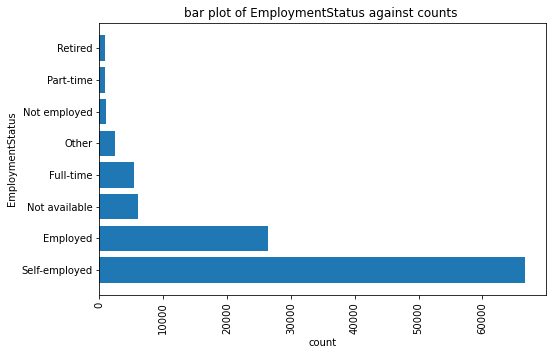

In [25]:
# A function to get the barplot of the borrowers employment status
barplot(new_prosper_loan, 'EmploymentStatus')

**From the barplot of EmploymentStatus against counts above, it can be observed that more people who requested for the loan are employed of which majority are self-employed. Which means they would most likely pay back the loan with interest, which would favour the lender. But for making any conclusion, from the barplot above, we can only tell that the majority of the borrowers are self employed so we need to further explore for example,, the income range or the monthly income of the borrowers to know if they can afford to pay back the loan.**

### What are the income ranges of most people that requested for the loan?

In [26]:
# A function that returns a bar plot of a column and its count
def barplot(df, col):
    x = new_prosper_loan[col].unique()

# Return the Series having frequency count of each unique value in ascending order
    y = df[col].value_counts(sort= True)
    plt.figure(figsize = (8,5))
    plt.barh(x,y)

# Labeling the axes
    plt.xlabel('count')
    plt.ylabel(col)
    plt.title(f"bar plot of {col} against counts ");
    plt.xticks(rotation=90)
# Dsiplay the plot
    plt.show()  

In [27]:
# borrowers income range counts
IncomeRange_counts = new_prosper_loan['IncomeRange'].value_counts()
IncomeRange_counts

$25,000-49,999    31365
$50,000-74,999    30429
$100,000+         17151
$75,000-99,999    16688
$1-24,999          6991
Not displayed      5486
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

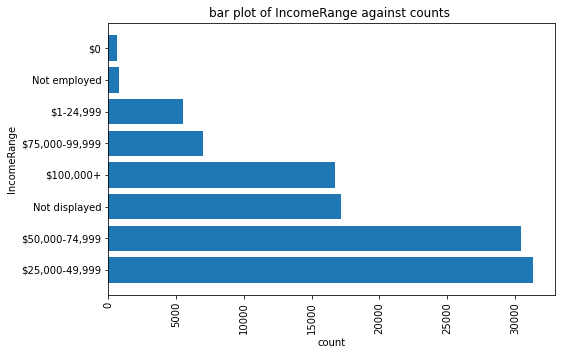

In [28]:
# A function to get the barplot of the borrowers income range
barplot(new_prosper_loan, 'IncomeRange')

**From the barplot above, it can be inferred that most of the borrowers that requested for the loan has an income range between \\$25,000-49,999 and \\$50,000-74,999. Knowing the borrowers income range still would not guarantee he/she would be able to pay back the loan as this would depend on the amount of the original loan taken by the borrower plus the lenders interest.** 

### How much of the original loan is mostly requested by the borrowers

In [29]:
# Create a histogram function 
def histogram(df, col, step):
    bins = np.arange(0, df[col].max()+ step, step)
    plt.figure(figsize = (8,5))
    plt.hist(data = df , x = col, bins = bins);
    plt.xlabel(col + '($)')
    plt.ylabel('counts')
    plt.title(f"Histogram plot of counts against {col}");
    

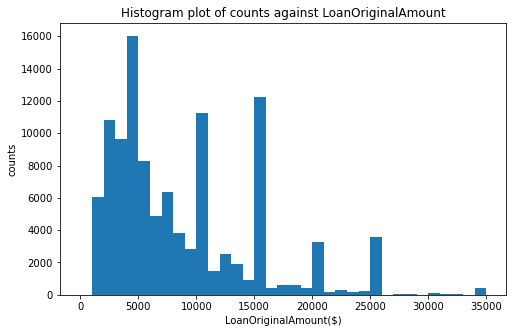

In [30]:
# function to check the count against the loan original amount by using bins with step-size 1000. 
histogram(new_prosper_loan,'LoanOriginalAmount', 1000)

**From the histogram above, it can be observed that more borrowers requested for a loan of \\$5000. A good numbers of borrowers also requested a loan amount of about \\$15000 and \\$10000.** 

### what are the most stated monthly income of the borowers requesting for the loan.

In [31]:
# Describe the StatedMonthlyIncome column of the new_prosper_loan data
new_prosper_loan['StatedMonthlyIncome'].describe()

count    1.095370e+05
mean     5.636244e+03
std      7.583934e+03
min      0.000000e+00
25%      3.250000e+03
50%      4.666667e+03
75%      6.833333e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [32]:
# Transform the describe() to a scale of log10
np.log10(new_prosper_loan['StatedMonthlyIncome'].describe())

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.039561
mean     3.750990
std      3.879895
min          -inf
25%      3.511883
50%      3.669007
75%      3.834633
max      6.243039
Name: StatedMonthlyIncome, dtype: float64

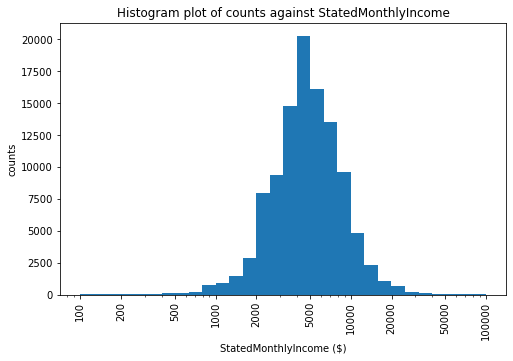

In [33]:
# Histogram of counts against the StatedMonthlyIncome.
plt.figure(figsize = (8,5))
bins = 10 ** np.arange(2, 5+0.1, 0.1)
ticks = [100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = new_prosper_loan , x = 'StatedMonthlyIncome', bins = bins);
plt.xscale('log')
plt.xticks(ticks, labels);
plt.xlabel('StatedMonthlyIncome ($)')
plt.ylabel('counts')
plt.title(f"Histogram plot of counts against StatedMonthlyIncome");
plt.xticks(rotation=90);

**From the histogram plot above, it can be said that majority of the borrowers of the loan earn between \\$4000-5000 dollars as their monthly income. it should be noted that this monthly income was stated by the borrowers themselves while requesting for the loan. So, it would be appropriate to verify these income stated by the borrowers.**

**Note: A scale transformation from linear to log was done on the x-axis for the StatedMonthlyIncome so as to accomodate all its values within the given space (histogram).** 

### Are majority of the borrowers who stated their income telling the truth ?

**so lets check if majority of the borrowers income is true(IncomeVerifiable)**

In [34]:
# value count of borrowers IncomeVerifiable
IncomeVerifiable_counts = new_prosper_loan['IncomeVerifiable'].value_counts()
IncomeVerifiable_counts

True     100989
False      8548
Name: IncomeVerifiable, dtype: int64

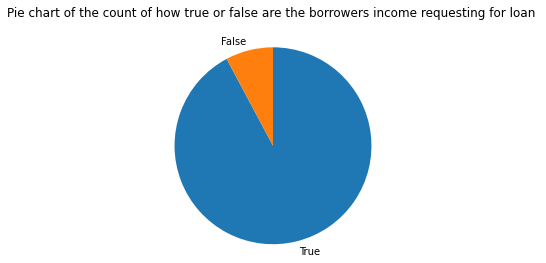

In [35]:
# pie chart to check the IncomeVerifiable of majority of the borrowers requesting for the loan
plt.pie(IncomeVerifiable_counts, labels = IncomeVerifiable_counts.index, startangle = 90, counterclock = False);
plt.axis('square')
plt.title(f'Pie chart of the count of how true or false are the borrowers income requesting for loan \n');

**The pie chart above indicates that majority of the borrowers who stated their income are telling the truth. This means the lender can trust a good number of people requesting for the loan.** 

### How much are majority of the borrowers likely to pay for their MonthlyLoanPayment

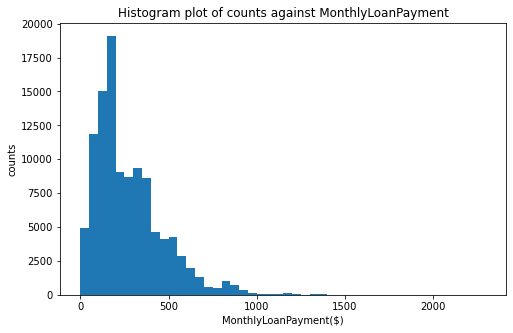

In [36]:
# fuctoin to check the histogram of the MonthlyLoanPayment stated by majority of the borrowers
histogram(new_prosper_loan,'MonthlyLoanPayment', 50)

**Majority of the borrowers are likely to pay about 200 to \\$250 as their MonthlyLoanPayment from the histogram above.**

### How many people amongst the borrowers of the loan own a house?

In [37]:
# comparing the counts of the borrowers that own a house to those that does not own a house.
house_counts = new_prosper_loan['IsBorrowerHomeowner'].value_counts()
house_counts 

True     55883
False    53654
Name: IsBorrowerHomeowner, dtype: int64

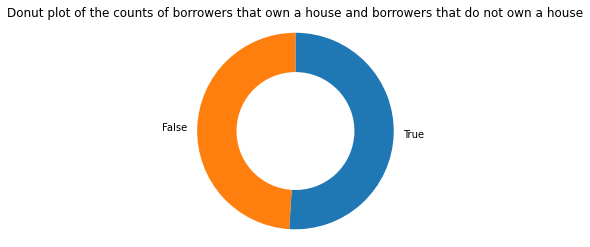

In [38]:
# using a donut plot to check how many borrowers of the loan are house owners(true) and those that are not house owners(false) 
plt.pie(house_counts, labels = house_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square')
plt.title(f"Donut plot of the counts of borrowers that own a house and borrowers that do not own a house");

**from the donut plot above, we can observe that the numbers of borrowers that own a house is just a little more than those that do not own a house. Infact one can say, the numbers of borrowers that own a house and those that do not, are approximately equal with just a slight difference.**

### What is the LoanStatus of majority of the borrowers requesting for the loan

In [39]:
# value count of borrowers LoanStatus
LoanStatus_counts = new_prosper_loan['LoanStatus'].value_counts()
LoanStatus_counts

Current                   54484
Completed                 36609
Chargedoff                11701
Defaulted                  4496
Past Due (1-15 days)        793
Past Due (31-60 days)       356
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       264
FinalPaymentInProgress      201
Past Due (>120 days)         16
Cancelled                     2
Name: LoanStatus, dtype: int64

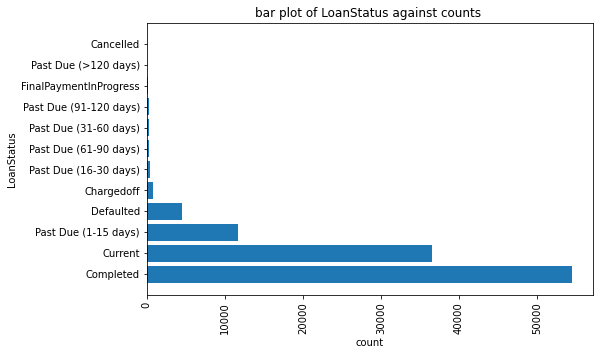

In [40]:
# A function to get the barplot of majority of the borrowers LoanStatus
barplot(new_prosper_loan, 'LoanStatus')

**From the barplot above, it shows that majority of the borrowers have completed their payment of the loan.** 

### What is the major listing category of the borrowers?

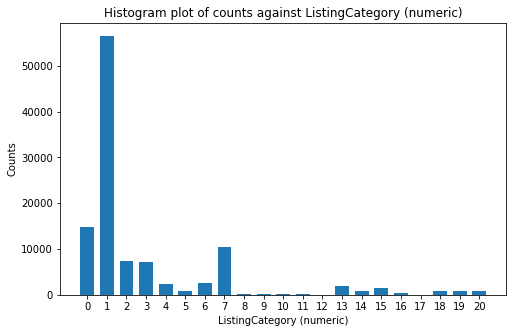

In [41]:
# histogram of the listingcategories of the borrowers making gaps between individual bars
bin_edges = np.arange(-0.5, 20.5+1, 1)
plt.figure(figsize = (8,5))
plt.hist(data = new_prosper_loan, x='ListingCategory (numeric)', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(0, 20+1, 1));
plt.xlabel('ListingCategory (numeric)')
plt.ylabel('Counts')
plt.title(f"Histogram plot of counts against ListingCategory (numeric)");

**From the spaced histogram above 2 has the highest count. This implies majority of the borrowers selected Debt consolidation when posting their listing.** 

### What is the most common interest rate made by the lender ? 

In [42]:
# Create a histogram function
def histogram(df, col, step, bin_start, tick_start, tick_end, tick_step, a, b):
    bins = np.arange(bin_start, df[col].max()+ step, step)
    plt.figure(figsize = (a,b))
    plt.hist(data = df , x = col, bins = bins);
    plt.xticks(np.arange(tick_start, tick_end + tick_step, tick_step));
    plt.xlabel(col + '(%)')
    plt.ylabel('counts')
    plt.title(f"Histogram plot of counts against {col}");

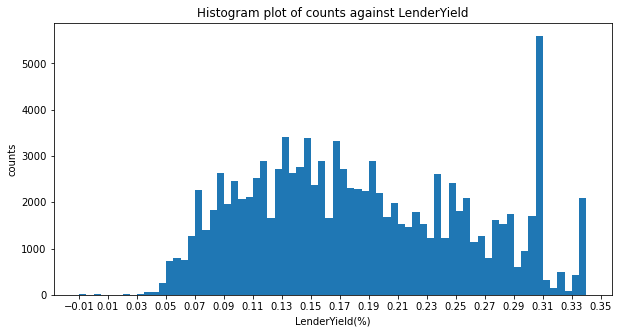

In [43]:
# Histogram function on the Lender's Yield
histogram(new_prosper_loan,'LenderYield', 0.005, -0.01, -0.01, 0.34, 0.02, 10, 5)

**From the histogram above the most common interest rate made by the lender on the loan less the servicing fee is within the range 0.30 to 0.31%.** 

### What is the most common borrower's interest rate for his loan?

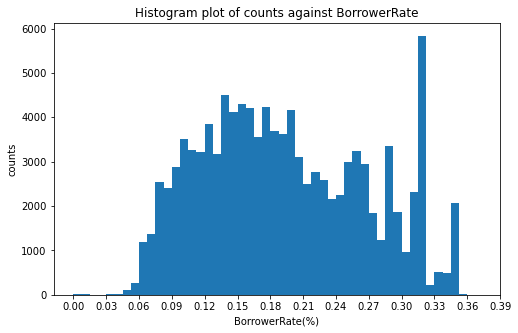

In [44]:
# Histogram function on the count vs borrowerRate
histogram(new_prosper_loan,'BorrowerRate', 0.0075, 0.0, 0.0, 0.36, 0.03, 8, 5)

**The most common borrower's interest rate on the loan is about 0.31 to 0.32%. It should be noted that the borrower's rate is the difference between the total repayment sum and the original loan that is the borrower's interest rate.** 

### What is the most common annual percentage rate (APR) of the borrower on the Loan.

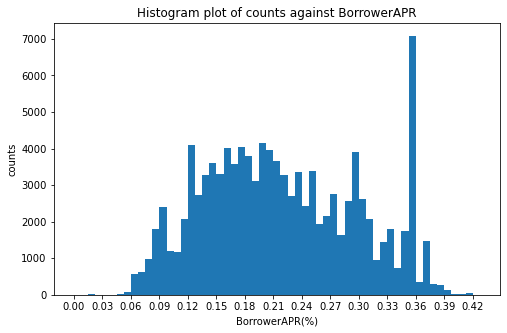

In [45]:
# Histogram of count vs Borrower's APR
histogram(new_prosper_loan,'BorrowerAPR', 0.0075, 0.0, 0.0, 0.42, 0.03, 8, 5)

**From the histogram above we can observe that the most common borrower's APR on the loan is about 0.35 to 0.36%.**

### What duration in months are mostly requested for by the borrower to pay back the loan ?

In [46]:
# Create a histogram function with gaps in between the bars, more or less a bar chart 
def barplot(df, col, step):
    bins = np.arange(0, df[col].max()+ step, step)
    plt.figure(figsize = (8,5))
    plt.hist(data = df , x = col, bins = bins, rwidth = 0.7);
    plt.xlabel(col + '(months)')
    plt.ylabel('counts')
    plt.title(f"Barplot of counts against {col}");

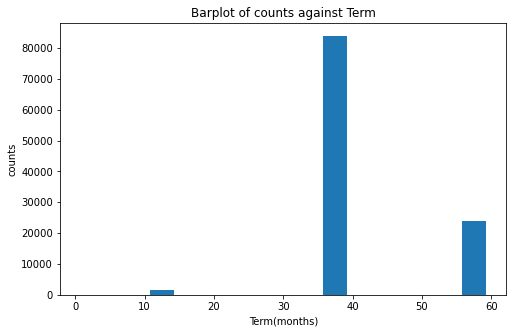

In [47]:
# Histogram to determine the most frequent length of the loan expressed in months by the borrower.
barplot(new_prosper_loan,'Term', 5)

**Most borrowers of the loan would prefer to payback the loan within a space of 40months which is 3years and 4months.**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The StatedMonthlyIncome variable took on a large range of values, so I looked at the data using a log transform. it has it peak value between 4000 to 5000 dollars

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
There was an ususal distribution in the histogram plot of count against term, no operation was performed to tidy the data since i am interested in the most frequently asked duration by the borrowers to pay back the loan.

## Bivariate Exploration

### Do borrowers who earn higher monthly income demand for higher amount of loan?

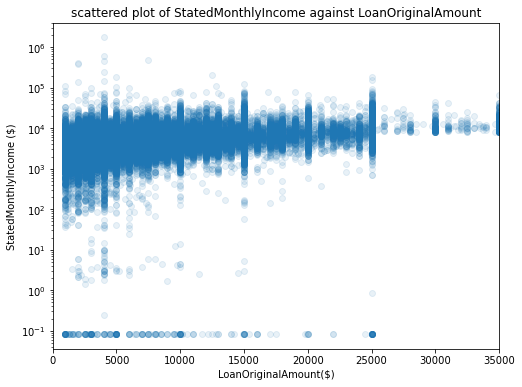

In [48]:
# scatter plot of StatedMonthlyIncome vs.LoanOriginalAmount, with log transform on StatedMonthlyIncome axis
plt.figure(figsize = [8, 6])
plt.scatter(data = new_prosper_loan, x = 'LoanOriginalAmount', y = 'StatedMonthlyIncome', alpha = 1/10)
plt.xlim([0, 35000])
plt.xlabel('LoanOriginalAmount($)')
plt.yticks(np.arange(10000, 100000+10000, 10000));
plt.yscale('log')
plt.ylabel('StatedMonthlyIncome ($)')
plt.title(f"scattered plot of StatedMonthlyIncome against LoanOriginalAmount");
plt.show()

**From the scattered plot above, it can be observe that an increase in the loan original amount leads to a slight increase in the stated monthly income of the borrower, Which implies StatedMonthlyIncome and the LoanOriginalAmount are positively correlated. We can say that borrowers who demanded for higher amount of loan have a slight increase in their stated monthly income.**

### Does the income range of the borrower influence the amount of loan he/she is requesting for?

C:\Users\user\AppData\Local\Temp\ipykernel_12528\3570547756.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_prosper_loan['IncomeRange'] = new_prosper_loan['IncomeRange'].astype(income);


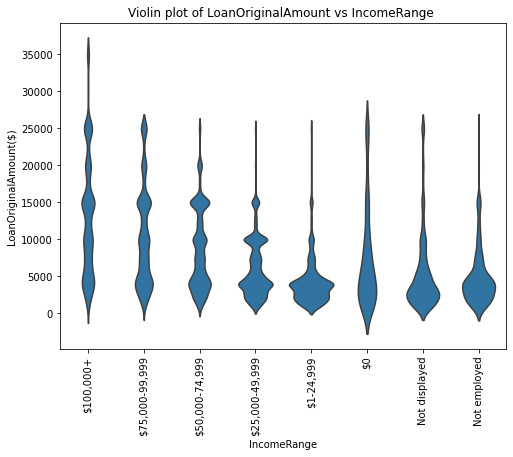

In [49]:
plt.figure(figsize = [8, 6])
income_ranges = [ '$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0', 'Not displayed', 'Not employed']
income = pd.api.types.CategoricalDtype(ordered=True, categories=income_ranges)
new_prosper_loan['IncomeRange'] = new_prosper_loan['IncomeRange'].astype(income);
base_color = sb.color_palette()[0]
sb.violinplot(data=new_prosper_loan, x='IncomeRange', y='LoanOriginalAmount', color=base_color, inner=None)
plt.ylabel('LoanOriginalAmount($)')
plt.title(f"Violin plot of LoanOriginalAmount vs IncomeRange ");
plt.xticks(rotation=90);

**From the violin plot above, we can say that the borrowers with the highest income range demanded more for a higher amount of loan. Also, the income range of \\$100,000+ has the highest amount of whiskers.There are also quite a good number of borrowers with the income range of \\$75,000-99,999 who demanded for a high amount of loan with more of them demanding for a loan below \\$5000. Those borrowers with the income range of \\$1-24,999 have majority of them demanding for a loan below \\$5000**.

### Plotting both violin and box plot side by side to further investigate the relationship between LoanOriginalAmount and IncomeRange.

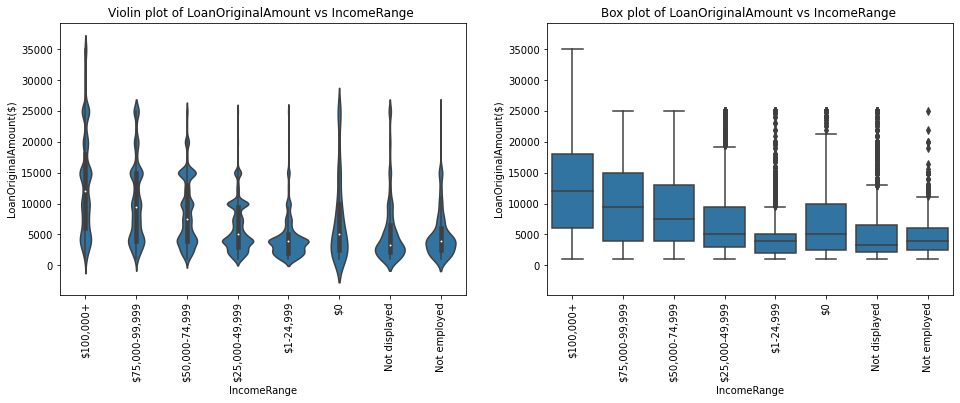

In [50]:
# A violin and a box plot
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]
# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=new_prosper_loan, x='IncomeRange', y='LoanOriginalAmount', color=base_color)
plt.ylabel('LoanOriginalAmount($)')
plt.title(f"Violin plot of LoanOriginalAmount vs IncomeRange ");
plt.xticks(rotation=90);

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=new_prosper_loan, x='IncomeRange', y='LoanOriginalAmount', color=base_color)
plt.ylabel('LoanOriginalAmount($)')
plt.title(f"Box plot of LoanOriginalAmount vs IncomeRange ");
plt.xticks(rotation=90);
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

**From the box plot above, on the average most borrowers who requested for a loan above \\$10,000 all have an income range of \\$100,000+ which means they are capable of paying back the loan with the required interest. While those that requested for the lowest amount of loan on the average have their income range not displayed. Those that were not employed also requested for a less amount of loan which is logical if not, they may not be able to pay back the loan.** 

### How true is the income range of the borrowers ?

In [51]:
# Use group_by() and size() to get the number of IncomeRange verifiable  and each combination of the two variable levels as a pandas Series
income_counts = new_prosper_loan.groupby(['IncomeRange', 'IncomeVerifiable']).size()
income_counts

IncomeRange     IncomeVerifiable
$100,000+       False                1254
                True                15897
$75,000-99,999  False                 895
                True                15793
$50,000-74,999  False                1678
                True                28751
$25,000-49,999  False                2301
                True                29064
$1-24,999       False                1023
                True                 5968
$0              False                 598
                True                   23
Not displayed   False                  92
                True                 5394
Not employed    False                 707
                True                   99
dtype: int64

In [52]:
# Use Series.reset_index() to convert a series into a dataframe object
income_counts = income_counts.reset_index(name='count')
income_counts

,IncomeRange,IncomeVerifiable,count
0,"$100,000+",False,1254
1,"$100,000+",True,15897
2,"$75,000-99,999",False,895
3,"$75,000-99,999",True,15793
4,"$50,000-74,999",False,1678
5,"$50,000-74,999",True,28751
6,"$25,000-49,999",False,2301
7,"$25,000-49,999",True,29064
8,"$1-24,999",False,1023
9,"$1-24,999",True,5968


In [53]:
# Use DataFrame.pivot() to rearrange the data, to have IncomeRange on rows
income_counts = income_counts.pivot(index = 'IncomeRange', columns = 'IncomeVerifiable', values = 'count')
income_counts

IncomeVerifiable,False,True
IncomeRange,,
"$100,000+",1254,15897
"$75,000-99,999",895,15793
"$50,000-74,999",1678,28751
"$25,000-49,999",2301,29064
"$1-24,999",1023,5968
$0,598,23
Not displayed,92,5394
Not employed,707,99


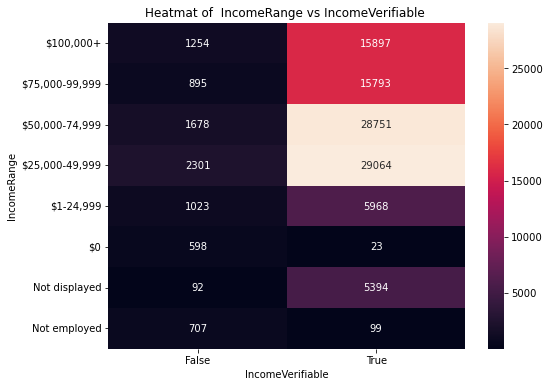

In [54]:
# Plot the heatmap
plt.figure(figsize = [8, 6])
sb.heatmap(income_counts, annot = True, fmt = 'd');
plt.title(f"Heatmat of  IncomeRange vs IncomeVerifiable ");

**From the heat map above, majority of the borrowers are being honest about their income range, especially those that have a very high income range between \\$25,000 to \\$100,000+. Majority of the borrowers that are not employed and those that have their income range as \\$0 are not being honest and some of them requested for a loan of over \\$15000 which is quite unfair.**

### What are the loan statuses of borrowers with high income range ?

In [55]:
# Create a heatmap function 
def histogram(var_counts, col1 , col2 ):
    var_counts = new_prosper_loan.groupby([col1, col2]).size()
    var_counts = var_counts.reset_index(name='count')
    var_counts = var_counts.pivot(index = col1, columns = col2, values = 'count')
    plt.figure(figsize = [8, 6])
    sb.heatmap(var_counts, annot = True, fmt = 'd');
    plt.title(f"Heatmat of {col1}  vs  {col2}");

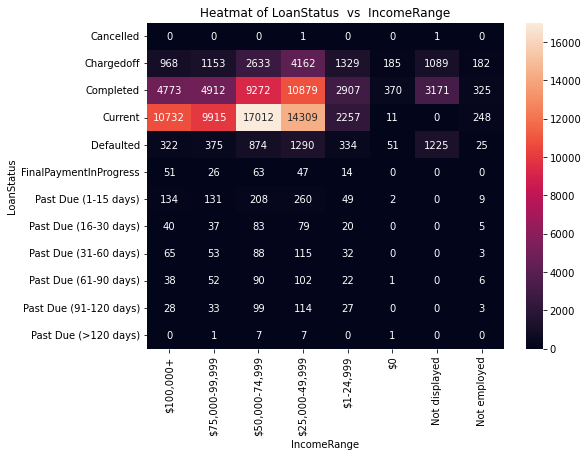

In [56]:
histogram(LoanStatus_counts, 'LoanStatus' , 'IncomeRange' )

In [57]:
# Create a heatmap function 
def histogram(var_counts, col1 , col2 ):
    var_counts = new_prosper_loan.groupby([col1, col2]).size()
    var_counts = var_counts.reset_index(name='count')
    var_counts = var_counts.pivot(index = col1, columns = col2, values = 'count')
    plt.figure(figsize = [8, 6])
    sb.heatmap(var_counts, annot = True, fmt = 'd');
    plt.title(f"Heatmat of {col1}  vs  {col2}");

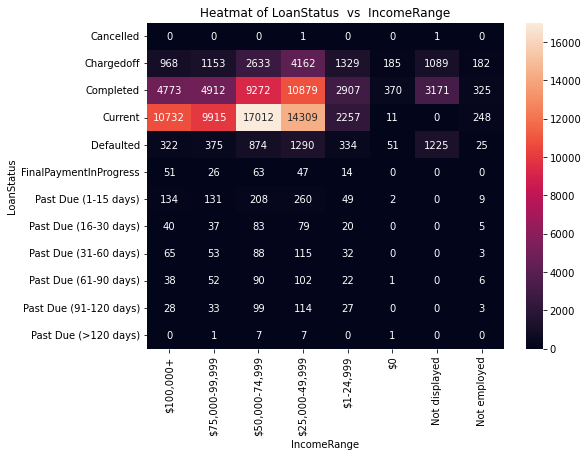

In [58]:
histogram(LoanStatus_counts, 'LoanStatus' , 'IncomeRange' )

**we can observe from the heatmap above that majority of the borrowers with high income range have their loan statuses as being current, meaning their loans are fully paid to date according to their contract. 10732 borrowers with income range of \\$100,000+ have fully paid their loan up to date according to the contract. 9915 borrowers with income range of \\$75,000-99,999, 17012 borrowers with income range of \\$50,000-74,999 and 14309 borrowers with income range of \\$25,000-49,999 all have their loan statuses has being current.**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

**From the scattered plot above, it can be observe that an increase in the loan original amount leads to a slight increase in the stated monthly income of the borrower, Which implies StatedMonthlyIncome and the LoanOriginalAmount are positively correlated. We can say that borrowers who demanded for higher amount of loan have a slight increase in their stated monthly income.**

**From the violin plot above, we can say that the borrowers with the highest income range demanded more for a higher amount of loan. Also, the income range of \\$100,000+ has the highest amount of whiskers.There are also quite a good number of borrowers with the income range of \\$75,000-99,999 who demanded for a high amount of loan with more of them demanding for a loan below \\$5000. Those borrowers with the income range of \\$1-24,999 have more borrowers demanding for a loan below \\$5000**.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

**Yes, i observed relationships between the other features(not the main feature(s) of interest), for instance:**
**From the first heat map above, majority of the borrowers are being honest about their income range, especially those that have a very high income range between \\$25,000 to \\$100,000+. Majority of the borrowers that are not employed and those that have their income range as \\$0 are not being honest and some of them requested for a loan of over \\$15000 which is quite unfair.**

## Multivariate Exploration

### How does the income range of the borrower affect his monthly loan payment and loan original amount?

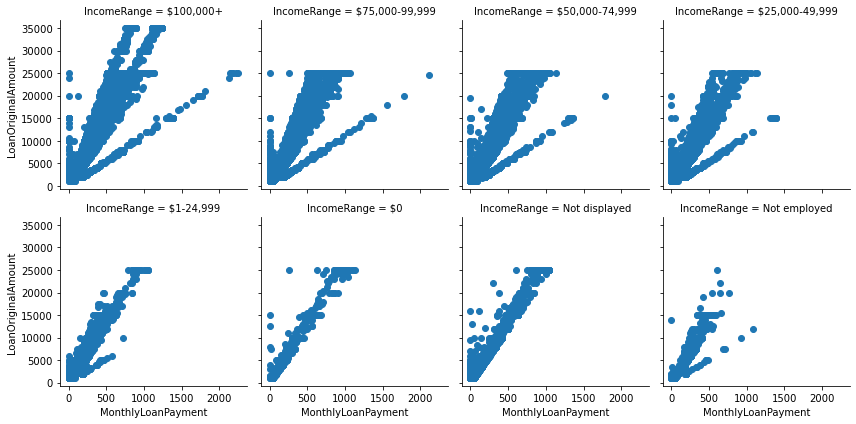

In [59]:
# Facetted scattered plot
g = sb.FacetGrid(data = new_prosper_loan, col = 'IncomeRange', col_wrap = 4,);
g.map(plt.scatter, 'MonthlyLoanPayment', 'LoanOriginalAmount');

**The common features amongst the facetted scattered plot of the various income ranges is that an increase in the loan original amount leads to a corresponding increase in the monthly loan payment. For example the borrowers with income range of \\$100,000+ requested for the highest amount of original loan which is logical because they can afford it judging from their income range.**   

## Conclusions

**From the plots of the second heatmap above we can conclude that majority of the borrowers with high income range have their loan statuses as being current, meaning their loans are fully paid to date according to their contract. 10732 borrowers with income range of \\$100,000+ have fully paid their loan up to date according to the contract. 9915 borrowers with income range of \\$75,000-99,999, 17012 borrowers with income range of \\$50,000-74,999 and 14309 borrowers with income range of \\$25,000-49,999 all have their loan statuses has being current.**

**we can observe from the first box plot above, on the average, most borrowers who requested for a loan above \\$10,000 all have an income range of \\$100,000+ which means they are capable of paying back the loan with the required interest. While those that requested for the lowest amount of loan on the average have their income range not displayed. Those that were not employed also requested for a lesser amount of loan which is logical if not, they may not be able to pay back the loan.**

**Also from the first heat map above, majority of the borrowers are being honest about their income range, especially those that have a very high income range between \\$25,000 to \\$100,000+. Many of the borrowers that are not employed and those that have their income range as \\$0 are not being honest and some of them requested for a loan of over \\$15000 which is quite unfair.**
